<h1>Random Forest</h1>

En este cuaderno, se implementa una estrategia de predicción independiente para distintas características de un conjunto de datos genéticos utilizando Random Forest. A diferencia de otros enfoques que podrían realizar una predicción conjunta para todas las características, aquí se entrena un modelo de Random Forest por cada columna objetivo. Este enfoque permite capturar de manera más precisa las relaciones específicas entre las características genéticas del conjunto de datos.

Aunque los conjuntos de entrenamiento y test no presentan valores faltantes, este cuaderno está diseñado para realizar predicciones independientes en las columnas del conjunto de test, entrenando a Random Forest para cada columna objetivo por separado.

Los principales objetivos de este cuaderno son:

- Entrenar modelos de Random Forest por columna para predecir valores específicos en el conjunto de test.
- Evaluar el rendimiento de los modelos al predecir varias características genéticas de manera independiente.
- Comparar las diferencias en la precisión y eficiencia al aplicar modelos entrenados por columna en lugar de hacer una predicción conjunta.

Descripción del enfoque
- Entrenamiento por columna: Se entrena un modelo de Random Forest para cada columna objetivo. Para cada modelo, las demás columnas del conjunto de datos actúan como características predictoras.
- Predicción independiente: Al realizar predicciones específicas para cada columna, se garantiza que el modelo se centre 
- Evaluación: Se analiza el rendimiento de cada modelo en términos de precisión y se comparan los resultados obtenidos para cada una de las columnas objetivo.



# Introduction



In [1]:

import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt


In [2]:
# specify a seed for repeating the exact dataset splits
np.random.seed(seed=28213)

# Dataset

## Loading data

In [3]:
df_train = pd.read_parquet('../data/processed/df_train_reduced.parquet')
df_test= pd.read_parquet('../data/processed/df_test_reduced.parquet')
df_test_missing_10 = pd.read_parquet('../data/processed/df_test_reduced_missing_10.parquet')
df_test_missing_20 = pd.read_parquet('../data/processed/df_test_reduced_missing_20.parquet')
df_test_missing_30 = pd.read_parquet('../data/processed/df_test_reduced_missing_30.parquet')
df_test_missing_40 = pd.read_parquet('../data/processed/df_test_reduced_missing_40.parquet')

In [4]:
df_test_missing_10.head(10)

,10335183_chrXV_303214_G_T,10341838_chrXV_309869_T_C,10341923_chrXV_309954_G_A,10342190_chrXV_310221_T_C,10342543_chrXV_310574_A_G,10344120_chrXV_312151_C_T,10346156_chrXV_314187_C_G,10349298_chrXV_317329_C_T,3141305_chrV_249350_C_T,10383039_chrXV_351070_C_T,...,10640336_chrXV_608367_C_T,1428699_chrIV_68677_T_C,1428933_chrIV_68911_A_C,6970183_chrXI_391971_C_T,6970060_chrXI_391848_C_T,6969970_chrXI_391758_T_A,3698349_chrVI_229520_A_G,6969924_chrXI_391712_C_T,5535875_chrIX_143302_C_T,7948843_chrXII_703815_C_T
0,1.0,NaN,1.0,1.0,1.0,1.0,NaN,1.0,1.0,2.0,...,2.0,1.0,1.0,1.0,1.0,NaN,2.0,1.0,1.0,1.0
1,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,2.0,1.0,...,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0
2,2.0,2.0,NaN,2.0,NaN,NaN,2.0,2.0,1.0,2.0,...,2.0,NaN,1.0,1.0,1.0,NaN,1.0,1.0,2.0,1.0
3,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,...,NaN,2.0,2.0,NaN,2.0,2.0,2.0,2.0,NaN,2.0
4,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,1.0,1.0,2.0,2.0,2.0,2.0,NaN,1.0,1.0
5,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,...,1.0,1.0,1.0,2.0,2.0,NaN,1.0,2.0,2.0,2.0
6,NaN,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,NaN,...,2.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0
7,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,...,2.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,2.0
8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,...,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN
9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,...,1.0,2.0,NaN,2.0,2.0,2.0,1.0,NaN,2.0,1.0


In [5]:
df_train.head(10)

,10335183_chrXV_303214_G_T,10341838_chrXV_309869_T_C,10341923_chrXV_309954_G_A,10342190_chrXV_310221_T_C,10342543_chrXV_310574_A_G,10344120_chrXV_312151_C_T,10346156_chrXV_314187_C_G,10349298_chrXV_317329_C_T,3141305_chrV_249350_C_T,10383039_chrXV_351070_C_T,...,10640336_chrXV_608367_C_T,1428699_chrIV_68677_T_C,1428933_chrIV_68911_A_C,6970183_chrXI_391971_C_T,6970060_chrXI_391848_C_T,6969970_chrXI_391758_T_A,3698349_chrVI_229520_A_G,6969924_chrXI_391712_C_T,5535875_chrIX_143302_C_T,7948843_chrXII_703815_C_T
0,1,1,1,1,1,1,1,1,2,2,...,2,2,2,1,1,1,2,1,1,1
1,2,2,2,2,2,2,2,2,1,1,...,1,2,2,1,1,1,1,1,1,2
2,2,2,2,2,2,2,2,1,2,1,...,1,1,1,2,2,2,1,2,2,1
3,1,1,1,1,1,1,1,1,1,2,...,2,1,1,2,2,2,2,2,2,2
4,2,2,2,2,2,2,2,2,1,2,...,1,2,2,1,1,1,2,1,2,1
5,2,2,2,2,2,2,2,2,2,2,...,2,1,1,1,1,1,1,1,1,1
6,1,1,1,1,1,1,1,1,1,1,...,2,2,2,2,2,2,1,2,1,2
7,2,2,2,2,2,2,2,2,1,1,...,1,2,2,2,2,2,2,2,1,1
8,1,1,1,1,1,1,1,1,2,1,...,1,1,1,1,1,1,1,1,2,1
9,1,1,1,1,1,1,1,1,2,2,...,2,2,2,1,1,1,2,1,1,2


### Mostramos el numero de clases de entrenamieno y verificamos que están balanceadas

In [6]:
# Contar los valores de 0 y 1 en todo el DataFrame
total_counts = df_train.apply(pd.Series.value_counts).sum(axis=1)
print("Conteo total de clases en todo el DataFrame:")
print(total_counts)

Conteo total de clases en todo el DataFrame:
1    1756511
2    1756489
dtype: int64


# RANDOM FOREST

In [24]:
from sklearn.ensemble import RandomForestClassifier
import time
from joblib import Parallel, delayed
from sklearn.ensemble import RandomForestClassifier

def train_model_for_column(df_train, column):

    # Separar características (X) y etiquetas (y) para la columna actual
    X_train = df_train.drop(columns=[column])
    y_train = df_train[column]
    
    # Ajustar las clases para que sean 0 y 1 en lugar de 1 y 2 
    y_train_adjusted = y_train - 1

    # Entrenar el modelo RandomForest
    rf_model = RandomForestClassifier(
        n_estimators=50,      # Número de árboles en el bosque
        max_depth=5,           # Profundidad máxima del árbol
        random_state=42,
        n_jobs=-1,             # Usar todos los núcleos disponibles
        oob_score=True,        # Utilizar muestras fuera de la bolsa para evaluación
        verbose=0
    )
    
    try:
        # Ajustar el modelo con el conjunto de entrenamiento
        rf_model.fit(X_train, y_train_adjusted)
    except Exception as e:
        print(f"Error al entrenar la columna {column}: {str(e)}")

    return column, rf_model  # Devuelve la columna y el modelo


# Función para entrenar modelos para múltiples columnas en paralelo
def train_models_in_parallel(df_train, columns_to_process, n_jobs=-1):
    # Usar joblib para entrenar múltiples modelos en paralelo
    models = Parallel(n_jobs=n_jobs)(
        delayed(train_model_for_column)(df_train, column) for column in columns_to_process
    )
    
    # Convertir la salida en un diccionario de modelos por columna
    return {column: model for column, model in models}

In [25]:

# Entrenar los modelos en paralelo
trained_models = train_models_in_parallel(df_train, df_train.columns, n_jobs=-1)

### Predicting and Evaluating

In [34]:
from joblib import Parallel, delayed
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, precision_score, recall_score

# Predecir los valores faltantes en el conjunto de test (puedes llamarla múltiples veces para diferentes tests)
def predict_missing_values_for_test(df_test_missing, df_test_original, column, model):
    print(f"Prediciendo valores faltantes en la columna: {column}")
    
    # Filas con valores faltantes en la columna actual en el conjunto de test
    test_missing_mask = df_test_missing[column].isna()
    
    if test_missing_mask.sum() > 0:  # Solo si hay valores faltantes
        X_test_missing = df_test_missing.loc[test_missing_mask].drop(columns=[column])
        
        # Predecir las probabilidades en las filas con valores faltantes
        y_pred_proba = model.predict_proba(X_test_missing)
        y_pred = np.argmax(y_pred_proba, axis=1) + 1

        # Devolver las predicciones
        return y_pred, test_missing_mask
    else:
        return None, None  

# Aplicar predicciones y calcular accuracy general en múltiples columnas
def impute_and_evaluate_general(df_test_missing, df_test_original, columns_to_process, trained_models):
    df_test_imputed = df_test_missing.copy()

    all_y_true = []
    all_y_pred = []

    # Ejecutar la predicción en paralelo para todas las columnas
    n_jobs = -1
    results = Parallel(n_jobs=n_jobs)(delayed(predict_missing_values_for_test)(
        df_test_missing, df_test_original, column, trained_models[column]) 
        for column in columns_to_process)

    for i, column in enumerate(columns_to_process):
        if results[i][0] is not None:
            missing_rows = results[i][1]
            y_pred = results[i][0]
            y_true = df_test_original.loc[missing_rows, column]

            all_y_true.extend(y_true)
            all_y_pred.extend(y_pred)

            df_test_imputed.loc[missing_rows, column] = y_pred

    # Ver la distribución de las clases en las predicciones y valores verdaderos
    print("Distribución de las clases en las predicciones: ", np.unique(all_y_pred, return_counts=True))
    print("Distribución de las clases en los valores verdaderos: ", np.unique(all_y_true, return_counts=True))

    # Calcular varias métricas globales
    accuracy_general = accuracy_score(all_y_true, all_y_pred)

    # Calcular métricas por clase
    f1_per_class = f1_score(all_y_true, all_y_pred, average=None)  # Por clase
    precision_per_class = precision_score(all_y_true, all_y_pred, average=None)  # Por clase
    recall_per_class = recall_score(all_y_true, all_y_pred, average=None)  # Por clase

    # Calcular métricas globales promedio 
    f1_macro = f1_score(all_y_true, all_y_pred, average='macro')
    precision_macro = precision_score(all_y_true, all_y_pred, average='macro')
    recall_macro = recall_score(all_y_true, all_y_pred, average='macro')

    # Mostrar las métricas por clase
    print("F1-Score por clase: ", f1_per_class)
    print("Precisión por clase: ", precision_per_class)
    print("Recall por clase: ", recall_per_class)

    return df_test_imputed, accuracy_general, f1_macro, precision_macro, recall_macro

# Graficar accuracy para diferentes porcentajes de valores faltantes
def plot_multiple_metrics(missingness_levels, metrics_dict):
    plt.figure(figsize=(10, 6))
    
    for metric_name, metric_values in metrics_dict.items():
        plt.plot(missingness_levels, metric_values, marker='o', label=f'{metric_name}')
    
    plt.xlabel('Porcentaje de valores faltantes')
    plt.ylabel('Métrica')
    plt.title('Comparación de métricas vs Porcentaje de valores faltantes')
    plt.grid(True)
    plt.legend()
    plt.show()





In [27]:

missingness_levels = [10, 20, 30, 40]
accuracy_metrics = []
f1_metrics = []
precision_metrics = []
recall_metrics = []

# Cambiar la variable del bucle para evitar el conflicto
for level in missingness_levels:
    df_test_missing = globals()[f'df_test_missing_{level}_imputed']  # conjunto imputado
    
    # Imputar y calcular métricas
    df_test_imputed, accuracy, f1, precision, recall = impute_and_evaluate_general(
        globals()[f'df_test_missing_{level}'],  # Conjunto de test con missingness
        df_test,                                # Conjunto de test completo
        df_test.columns,                        # Columnas a procesar
        trained_models                          # Modelos entrenados
    )
    
    # Guardar métricas
    accuracy_metrics.append(accuracy)
    f1_metrics.append(f1)
    precision_metrics.append(precision)
    recall_metrics.append(recall)

print(accuracy_metrics)
print(f1_metrics)
print(precision_metrics)
print(recall_metrics)

# Mostrar los resultados
print(f"""Métricas:
- dataset 10% missingness:
  - Accuracy: {accuracy_metrics[0]:.4f}
  - F1-Score: {f1_metrics[0]:.4f}
  - Precisión: {precision_metrics[0]:.4f}
  - Recall: {recall_metrics[0]:.4f}
- dataset 20% missingness:
  - Accuracy: {accuracy_metrics[1]:.4f}
  - F1-Score: {f1_metrics[1]:.4f}
  - Precisión: {precision_metrics[1]:.4f}
  - Recall: {recall_metrics[1]:.4f}
- dataset 30% missingness:
  - Accuracy: {accuracy_metrics[2]:.4f}
  - F1-Score: {f1_metrics[2]:.4f}
  - Precisión: {precision_metrics[2]:.4f}
  - Recall: {recall_metrics[2]:.4f}
- dataset 40% missingness:
  - Accuracy: {accuracy_metrics[3]:.4f}
  - F1-Score: {f1_metrics[3]:.4f}
  - Precisión: {precision_metrics[3]:.4f}
  - Recall: {recall_metrics[3]:.4f}
""")

#  Graficar las métricas
metrics_dict = {
    "Accuracy": accuracy_metrics,
    "F1-Score": f1_metrics,
    "Precision": precision_metrics,
    "Recall": recall_metrics
}




Prediciendo valores faltantes en la columna: 10335183_chrXV_303214_G_T
Prediciendo valores faltantes en la columna: 10341838_chrXV_309869_T_C
Prediciendo valores faltantes en la columna: 10341923_chrXV_309954_G_A
Prediciendo valores faltantes en la columna: 10342190_chrXV_310221_T_C
Prediciendo valores faltantes en la columna: 10342543_chrXV_310574_A_G
Prediciendo valores faltantes en la columna: 10346156_chrXV_314187_C_G
Prediciendo valores faltantes en la columna: 10344120_chrXV_312151_C_T
Prediciendo valores faltantes en la columna: 10349298_chrXV_317329_C_T
Prediciendo valores faltantes en la columna: 3141305_chrV_249350_C_T
Prediciendo valores faltantes en la columna: 10383039_chrXV_351070_C_T
Prediciendo valores faltantes en la columna: 3141078_chrV_249123_G_A
Prediciendo valores faltantes en la columna: 3140777_chrV_248822_A_G
Prediciendo valores faltantes en la columna: 3140646_chrV_248691_T_G
Prediciendo valores faltantes en la columna: 3140241_chrV_248286_A_G
Prediciendo valo

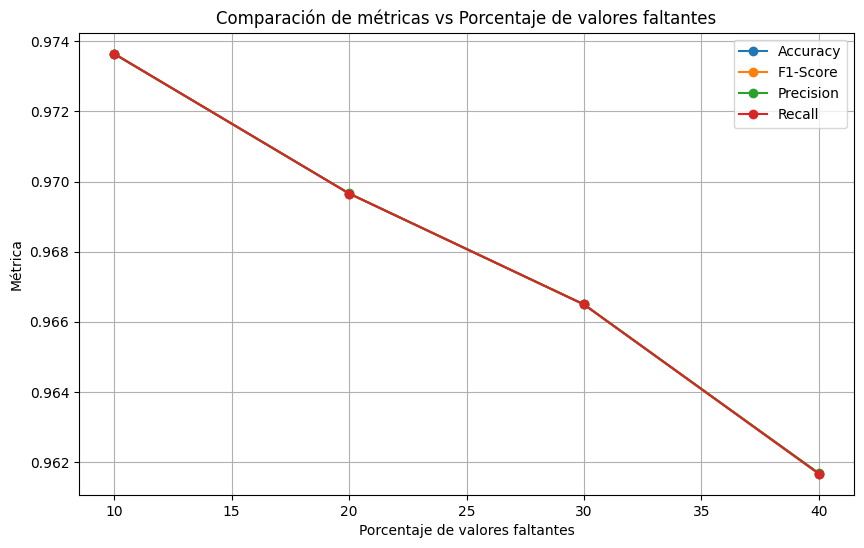

In [28]:
# Graficar las métricas en función del porcentaje de valores faltantes
plot_multiple_metrics(missingness_levels, metrics_dict)


In [33]:
trained_models

{'10335183_chrXV_303214_G_T': RandomForestClassifier(max_depth=5, n_estimators=50, n_jobs=-1, oob_score=True,
                        random_state=42),
 '10341838_chrXV_309869_T_C': RandomForestClassifier(max_depth=5, n_estimators=50, n_jobs=-1, oob_score=True,
                        random_state=42),
 '10341923_chrXV_309954_G_A': RandomForestClassifier(max_depth=5, n_estimators=50, n_jobs=-1, oob_score=True,
                        random_state=42),
 '10342190_chrXV_310221_T_C': RandomForestClassifier(max_depth=5, n_estimators=50, n_jobs=-1, oob_score=True,
                        random_state=42),
 '10342543_chrXV_310574_A_G': RandomForestClassifier(max_depth=5, n_estimators=50, n_jobs=-1, oob_score=True,
                        random_state=42),
 '10344120_chrXV_312151_C_T': RandomForestClassifier(max_depth=5, n_estimators=50, n_jobs=-1, oob_score=True,
                        random_state=42),
 '10346156_chrXV_314187_C_G': RandomForestClassifier(max_depth=5, n_estimators=50, n_job